# Collatz Conjecture
## Also know as 3n+1 problem
Very easy problem to understand but extraordinarly difficult to solve. 

## Import
Import all the required libraries.

In [1]:
import numpy as np
import time
import pickle as pck
from copy import deepcopy
import matplotlib.pyplot as plt

## Functions
Class for calculating the Collatz Conjecture from given positive integer. Try print everything to understand what is happening in the below class. 

In [2]:
class Collatz_Conj_Test(object):
    def __init__(self, num, allTerms=False, sleep_int=0.1, verbose=False):
        '''
        init:
            Purpose of this class is to check if given number reaches 1 and to see all the integers to visits 
            during this process. 
            Args:
                num: starting point for generating the Collatz Conjecture sequence. MUST BE POSITIVE INTEGER. 
                allTerms: whether to use detailed seq generator which will store all values or do some quick computations. 
                            Read the below functions for better explanation. 
                sleep_int: control the rate at which everything is printed to stdout.
                verbose: amount of information that is printed to stdout.
        '''
        self.num = num
        self.allTerms = allTerms
        self.sleep_int = sleep_int
        self.verbose = verbose
        
    def test(self):
        '''
        test:
            This function is used to generate the Collatz seq from given starting natural number. Can be used for testing.
            This function should be used if we want to see how the sequence goes from given positive natural number to 1. 
            Returns:
                god_array: it contains all the information regarding all the natural numbers. Basically it is a fancy
                name given by me to the array in which the first column is postive natural number and second column is 
                no. of steps requried to reach 1. 
        '''
        print('-'*50)
        print('Collatz Conjecture')
        print('Checking if given integer after some manipilation terminates at 1 ...')
        print('-'*50)
        if self.allTerms:
            num_steps, total_seq, step_seq = self.collatz_seq_gen_allTerms()
        else:
            num_steps, total_seq = self.collatz_seq_gen()
        sort_index = np.argsort(np.array(total_seq))
        god_array = np.concatenate((np.array(total_seq)[sort_index][:, np.newaxis], 
                                    np.array(step_seq)[sort_index][:, np.newaxis]), axis=1)
        return god_array
    
    def collatz_seq_gen_allTerms(self):
        '''
        collatz_seq_gen_allTerms:
            This function calculates each and every term in the sequence. It doesn't skip odd numbers. 
            Returns:
                num_steps: total number of steps requried to reach 1 starting from given integer 'num'.
                total_seq: this is a list containing all the terms in sequence.
                step_seq: no. of steps to reach 1 from the integers present in the sequence when starting from 'num'.
        '''
        cur_num = deepcopy(self.num)
        num_steps = 0
        total_seq = [cur_num]
        step_seq = []
        print('Starting term in the sequence: {0:.1f}'.format(cur_num))
        while cur_num != 1:
            if cur_num%2.0 == 0.0:
                cur_num = cur_num/2.0
                total_seq.append(cur_num)
                num_steps += 1
            else:
                cur_num = 3.0 * cur_num + 1.0
                total_seq.append(cur_num)
                num_steps += 1
            time.sleep(self.sleep_int)
            print('\r Next term in the sequence is {0:.1f}'.format(cur_num), end='')
        print('\n Sequence has ended at {0:.1f}'.format(cur_num))
        print('Total number of steps: ', num_steps)
        if self.verbose:
            print('Entire Sequence: \n', total_seq)
        step_seq = list(range(num_steps, -1, -1))
        return num_steps, total_seq, step_seq

    def collatz_seq_gen(self):
        '''
        collatz_seq_gen:
            This function is computational efficient because it skips one step while calculating the next term in the 
            sequence if the current term is odd. This function can be used for quick verification.
            Returns:
                num_steps: total number of steps requried to reach the 1.0 starting from given integer 'num'.
                total_seq: this is a list containing all the terms in sequence. Ofcourse with few terms are skipped.
                Hence it doesn't return step_seq like previous function. 
        '''
        cur_num = deepcopy(self.num)
        num_steps = 0
        total_seq = [cur_num]
        print('Starting term in the sequence: {0:.1f}'.format(cur_num))
        while cur_num != 1:
            if cur_num%2.0 == 0.0:
                cur_num = cur_num/2.0
                total_seq.append(cur_num)
                num_steps += 1
            else:
                cur_num = (3.0 * cur_num + 1.0)/2.0
                total_seq.append(cur_num)
                num_steps += 2
            time.sleep(self.sleep_int)
            print('\r Next term in the sequence is {0:.1f}'.format(cur_num), end='')
        print('\n Sequence has ended at {0:.1f}'.format(cur_num))
        print('Total number of steps: ', num_steps)
        if self.verbose:
            print('Entire Sequence: \n', total_seq)
        return num_steps, total_seq

Class for calculating for entire set of numbers plus skipping the numbers that has been already visited. 

In [3]:
class Collatz_Conj(object):
    def __init__(self, max_num=1e4, count=1e3):
        '''
        init:
            Purpose of this class is to calculate the conjecture for set of numbers. 
            Args:
                max_num: Generate inital god_array till this number.
                count: maximum number that has to be counted from max_num. 
        '''
        self.max_num = max_num
        self.count = count
        
    def collatz_seq(self):
        '''
        collatz_seq:
            This is the main function where we calculate the sequence for all given numbers. 
            Returns: 
                god_array
        '''
        # We need two files God_Array (binary file) and GlobalCount.txt (text file).
        # Not having both of them or having only of them initially shouldn't be proble. But, having only one of them will 
        # make the code do some redundant searches initally. Need to figure out how to solve this problem. 
        print('-'*50)
        print('Collatz Conjecture')
        print('Generating entire sequence for all natural numbers ...')
        print('-'*50)
        if np.DataSource().exists('God_Array'):
            print('Loading God Array', '.'*15)
            self.god_array = self.load_data()
        else:
            print('\n')
            print('-'*15, 'Generating God Array', '-'*15)
            self.god_array = self.gen_god_array()
            print('\n', '-'*15, 'Storing God Array', '-'*15)
            self.log_data()
        if np.DataSource().exists('GlobalCount.txt'):
            self.global_count = np.loadtxt('GlobalCount.txt')
            print('Calculating God Array for next', self.count, 'integers starting from', self.global_count)
        else:
            self.global_count = deepcopy(self.max_num)
            print('Calculating God Array for next', self.count, 'integers starting from', self.global_count)
        self.gen_god_array_smart()
        self.log_data()
        np.savetxt('GlobalCount.txt', [self.global_count+self.count])
        return self.god_array

    def load_data(self):
        '''
        load_data:
            This function is used to load the god_array. 
            Returns:
                god_array: array containing information of all natural numbers.
        '''
        god_array = pck.load(open('God_Array', 'rb'))
        return god_array
    
    def log_data(self):
        '''
        log_data:
            This function is used to save the god_array. We will use pickle to store in binary files instead of txt files.
            But pickeled files have max size cap and that is 2GB. Eventually when the size of the god_array file crosses
            this number it will stop storing. 
            My guess is that this should happen when god_array has stored information till ~78k numbers. 
            Which is pretty small sadly. 
            # TODO: Find some other trick for this. 
            Args:
                god_array: array containing information of all natural numbers.
        '''
        if self.god_array.nbytes < 2e9:
            pck.dump(self.god_array, open('God_Array', 'wb'), protocol=pck.HIGHEST_PROTOCOL)
        else:
            print('#'*25)
            print('Unfortunately can\'t store god_array. File max size reached')
            print('#'*25)

    def gen_god_array(self):
        '''
        gen_god_array:
            This function generates the god array for first max_num of digits.
            Args:
                max_num: first 'n' natural numbers
            Returns:
                god_array: array containing information about all the integers
        '''
        god_array = np.array([]).reshape(0, 2)
        for i in range(1, int(self.max_num)+1):
            time.sleep(0.001)
            print('\r God array for first {0:.1f} natural numbers'.format(i), end='')
            num_steps, total_seq, step_seq = self.collatz_seq_gen_allTerms_light(i)
            child_array = np.concatenate((np.array(total_seq)[:, np.newaxis], 
                                        np.array(step_seq)[:, np.newaxis]), axis=1)
            god_array = np.concatenate((god_array, child_array), axis=0)
        god_array = np.unique(god_array, axis=0)
        return god_array

    def collatz_seq_gen_allTerms_light(self, num):
        '''
        collatz_seq_gen_allTerms_light:
            This function duplicate of the above function collatz_seq_gen_allTerms  but lighter version i.e., 
            it has no print statements but does only calculations.
            Args:
                num: starting point for the seq.
            Returns:
                num_steps: total number of steps requried to reach the 1.0 starting from given integer 'num'.
                total_seq: this is a list containing all the terms in sequence.
                step_seq: no. of steps to reach 1.0 from the integers present in the sequence when starting from 'num'.
        '''
        cur_num = deepcopy(num)
        num_steps = 0
        total_seq = [cur_num]
        step_seq = []
        while cur_num != 1:
            if cur_num%2.0 == 0.0:
                cur_num = cur_num/2.0
                total_seq.append(cur_num)
                num_steps += 1
            else:
                cur_num = 3.0 * cur_num + 1.0
                total_seq.append(cur_num)
                num_steps += 1
        step_seq = list(range(num_steps, -1, -1))
        return num_steps, total_seq, step_seq
    
    def gen_god_array_smart(self):
        '''
        gen_god_array_smart:
            This function generates the god array for first max_num of digits.
            Args:
                max_num: first 'n' natural numbers
            Returns:
                god_array: array containing information about all the integers
        '''
        for i in range(int(self.global_count)+1, int(self.global_count+self.count)+1):
            time.sleep(0.001)
            print('\r God array for first {0:.1f} natural numbers'.format(i), end='')
            num_steps, total_seq, step_seq = self.collatz_seq_gen_smart(i)
#             sort_index = np.argsort(np.array(total_seq))
            child_array = np.concatenate((np.array(total_seq)[:, np.newaxis], 
                                        np.array(step_seq)[:, np.newaxis]), axis=1)
            self.god_array = np.concatenate((self.god_array, child_array), axis=0)
    
    def collatz_seq_gen_smart(self, num):
        '''
        collatz_seq_gen_smart:
            This function duplicate of the above function but lighter version i.e., it has no print statements but does
            only calculations.
            Args:
                num: starting point for the seq.
            Returns:
                num_steps: total number of steps requried to reach the 1.0 starting from given integer 'num'.
                total_seq: this is a list containing all the terms in sequence.
                step_seq: no. of steps to reach 1.0 from the integers present in the sequence when starting from 'num'.
        '''
        cur_num = deepcopy(num)
        num_steps = 0
        total_seq = [cur_num]
        step_seq = []
        elm = self.check_god_array(cur_num)
        if elm.size == 0:
            while cur_num != 1:
                if cur_num%2.0 == 0.0:
                    cur_num = cur_num/2.0
                    elm = self.check_god_array(cur_num)
                    if elm.size > 0:
                        step_seq = list(range(num_steps, -1, -1))
                        return num_steps, total_seq, step_seq
                    else:
                        total_seq.append(cur_num)
                        num_steps += 1
                else:
                    cur_num = 3.0 * cur_num + 1.0
                    elm = self.check_god_array(cur_num)
                    if elm.size > 0:
                        step_seq = list(range(num_steps, -1, -1))
                        return num_steps, total_seq, step_seq
                    else:
                        total_seq.append(cur_num)
                        num_steps += 1
        step_seq = list(range(num_steps, -1, -1))
        return num_steps, total_seq, step_seq  
    
    def check_god_array(self, num):
        '''
        check_god_array:
            This function is used to check if the element which is under observations currently was visited previously
            Args:
                god_array: array containing all the information regarding natural numbers.
                num: positive integer under observation.
            Return:
                element: that value and no. of steps required to reach 1.0 from that point.
        '''
        idx = np.where(self.god_array[:, 0]==num)
        element = self.god_array[idx]
        return element

## Generate Sequences
### Part 1
Testing out the first class which is used to calculate Collatz Conjecture for given number.

In [4]:
gen = Collatz_Conj_Test(num=7, allTerms=True, sleep_int=0.1, verbose=True)
god_array = gen.test()

--------------------------------------------------
Collatz Conjecture
Checking if given integer after some manipilation terminates at 1 ...
--------------------------------------------------
Starting term in the sequence: 7.0
 Next term in the sequence is 1.00
 Sequence has ended at 1.0
Total number of steps:  16
Entire Sequence: 
 [7, 22.0, 11.0, 34.0, 17.0, 52.0, 26.0, 13.0, 40.0, 20.0, 10.0, 5.0, 16.0, 8.0, 4.0, 2.0, 1.0]


### Part 2
Here we can see how second class can be used to generate the god_array when we dont have the required files. **Note:** if you want to see the difference please remove the `God_array` and `GlobalCount.txt` files from working directory and run the code again. 

In [5]:
gen = Collatz_Conj(max_num=1e4, count=1e2)
god_array = gen.collatz_seq()

--------------------------------------------------
Collatz Conjecture
Generating entire sequence for all natural numbers ...
--------------------------------------------------
Loading God Array ...............
Calculating God Array for next 100.0 integers starting from 20200.0
 God array for first 20300.0 natural numbers

### Part 3
Here we can see how we can calculate for next set of numbers from using the given god_array. 

In [6]:
gen = Collatz_Conj(count=1e2)
god_array = gen.collatz_seq()

--------------------------------------------------
Collatz Conjecture
Generating entire sequence for all natural numbers ...
--------------------------------------------------
Loading God Array ...............
Calculating God Array for next 100.0 integers starting from 20300.0
 God array for first 20400.0 natural numbers

### Part 4

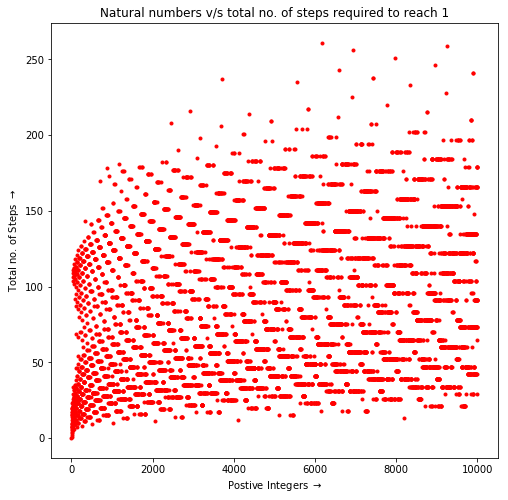

In [18]:
plt.figure(figsize=(8, 8))
plt.plot(god_array[:10000, 0], god_array[:10000, 1], 'r.')
plt.xlabel(r'Postive Integers $\rightarrow$')
plt.ylabel(r'Total no. of Steps $\rightarrow$')
plt.title('Natural numbers v/s total no. of steps required to reach 1')
plt.savefig('Steps.pdf')
plt.show()